# Decision Tree

## 연속형 데이터기반의 Tree 만들기(if문)
- 나이와 발 사이즈로 성별 추측

In [2]:
import pandas as pd

In [3]:
data={
    'age':[28,22,11,10],
    'fsize':[270,235,280,220],
    'gender':['male','female','male','female']
}
data_df = pd.DataFrame(data)
data_df

,age,fsize,gender
0,28,270,male
1,22,235,female
2,11,280,male
3,10,220,female


In [15]:
#코드작성
for i in data_df.index:
    if data_df.age[i] <= 20:
        if data_df.fsize[i] <= 250:
            print('나이:{}, 사이즈:{}, 실제 성별:{}\t-> 예측 성별:여자'\
                  .format(data_df.age[i], data_df.fsize[i], data_df.gender[i]))
        else:
            print('나이:{}, 사이즈:{}, 실제 성별:{}\t-> 예측 성별:남자'\
                  .format(data_df.age[i], data_df.fsize[i], data_df.gender[i]))
    else:
        if data_df.fsize[i] >= 250:
            print('나이:{}, 사이즈:{}, 실제 성별:{}\t-> 예측 성별:남자'\
                  .format(data_df.age[i], data_df.fsize[i], data_df.gender[i]))
        else:
            print('나이:{}, 사이즈:{}, 실제 성별:{}\t-> 예측 성별:여자'\
                  .format(data_df.age[i], data_df.fsize[i], data_df.gender[i]))
#코드작성이 끝나면 target_index를 0부터 3까지 변경하면서 실행

나이:28, 사이즈:270, 실제 성별:male	-> 예측 성별:남자
나이:22, 사이즈:235, 실제 성별:female	-> 예측 성별:여자
나이:11, 사이즈:280, 실제 성별:male	-> 예측 성별:남자
나이:10, 사이즈:220, 실제 성별:female	-> 예측 성별:여자


# Feature Engineering

In [16]:
df=pd.read_csv('data/train.csv')

In [17]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
df_test=pd.read_csv('data/test.csv')

In [19]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [20]:
#전체 나이 평균, 즉 df['Age'].mean()을 빈칸에 넣기
df['Age']=df['Age'].fillna(df['Age'].mean())

In [21]:
#테스트셋에도 똑같이 적용해야함
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())

In [22]:
df.loc[df['Age']<10, 'Age']=0
df.loc[(df['Age']>=10) & (df['Age']<20), 'Age']=1
df.loc[(df['Age']>=20) & (df['Age']<30), 'Age']=2
df.loc[(df['Age']>=30) & (df['Age']<40), 'Age']=3
df.loc[(df['Age']>=40) & (df['Age']<50), 'Age']=4
df.loc[df['Age']>=50, 'Age']=5

In [23]:
df_test.loc[df['Age']<10, 'Age']=0
df_test.loc[(df['Age']>=10) & (df['Age']<20), 'Age']=1
df_test.loc[(df['Age']>=20) & (df['Age']<30), 'Age']=2
df_test.loc[(df['Age']>=30) & (df['Age']<40), 'Age']=3
df_test.loc[(df['Age']>=40) & (df['Age']<50), 'Age']=4
df_test.loc[df['Age']>=50, 'Age']=5

In [24]:
df['FamilySize']=df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,0


In [25]:
#테스트셋에도 똑같이 적용
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']

In [26]:
# 더이상 필요 없는 열은 버리고, 필요한 필드만 남기기
train = df[['Survived', 'Sex', 'Age', 'FamilySize']]
test = df_test[['Sex', 'Age', 'FamilySize']] # test데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize
0,0,male,2.0,1
1,1,female,3.0,1
2,1,female,2.0,0
3,1,female,3.0,1
4,0,male,3.0,0


In [27]:
# 운임도 빈칸(NaN)을 운임평균으로 채우기
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [28]:
#빈칸 정보, 값 요약 보기
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [40]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
#Embarked의 빈칸(NaN)을 가장 많이 존재하는 Embarked로 채우기
df['Embarked'] = df['Embarked'].fillna('S')
print(df.isnull().sum())
print(df['Embarked'].value_counts())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [46]:
# 필요한 필드만 남기기
train = df[['Survived', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
test = df_test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']] 
train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,male,2.0,1,7.2500,S
1,1,female,3.0,1,71.2833,C
2,1,female,2.0,0,7.9250,S
3,1,female,3.0,1,53.1000,S
4,0,male,3.0,0,8.0500,S


In [47]:
#sex를 숫자형으로 바꾸어주기
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,S,0


In [48]:
#Embarked를 숫자형으로 바꾸어주기.
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

df_test.loc[df_test['Embarked'] == 'S', 'Embarked'] = 0
df_test.loc[df_test['Embarked'] == 'C', 'Embarked'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'Embarked'] = 2

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,0,0


In [49]:
train = df[['Survived', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
test = df_test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']] # test데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,0,2.0,1,7.2500,0
1,1,1,3.0,1,71.2833,1
2,1,1,2.0,0,7.9250,0
3,1,1,3.0,1,53.1000,0
4,0,0,3.0,0,8.0500,0


# Scikit-learn으로 실제 코드 구현하기

In [50]:
#input data와 target data 나누기
x_train = train[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
y_train = train['Survived'] # 선택할 열이 하나면, []를 한번만

x_train

,Sex,Age,FamilySize,Fare,Embarked
0,0,2.0,1,7.2500,0
1,1,3.0,1,71.2833,1
2,1,2.0,0,7.9250,0
3,1,3.0,1,53.1000,0
4,0,3.0,0,8.0500,0
...,...,...,...,...,...
886,0,2.0,0,13.0000,0
887,1,1.0,0,30.0000,0
888,1,2.0,3,23.4500,0
889,0,2.0,0,30.0000,1


In [51]:
from sklearn.tree import DecisionTreeClassifier                           

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

print('training set accuracy:', tree.score(x_train, y_train))

training set accuracy: 0.9450056116722784


In [52]:
x_test = test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
# 사실 이 작업을 안해도 test와 동일하기 때문에 생략해도 됨

x_test

,Sex,Age,FamilySize,Fare,Embarked
0,0,0.0,0,7.8292,2
1,1,0.0,1,7.0000,0
2,0,0.0,0,9.6875,2
3,0,0.0,0,8.6625,0
4,1,0.0,2,12.2875,0
...,...,...,...,...,...
413,0,0.0,0,8.0500,0
414,1,0.0,0,108.9000,1
415,0,0.0,0,7.2500,0
416,0,0.0,0,8.0500,0


In [53]:
prediction = tree.predict(x_test) # 즉 y_test가 만들어집니다.
prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
submit = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': prediction
})

submit.to_csv('submit.csv', index=False)

In [55]:
my_prediction = pd.read_csv('submit.csv')
my_prediction.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


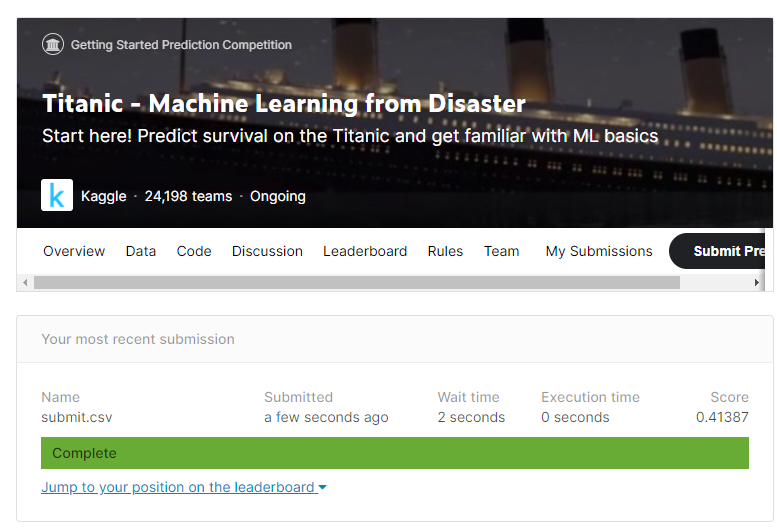

In [58]:
from IPython.display import Image
Image("submission.png") 